#단어의 표현 방법

단어의 표현 방법은 국소 표현(Local Representation / Discrete Representation)과 분산 표현(Distributed Representation / Continuous Representation)으로 나뉜다. 국소 표현은 문맥을 보지 않고 단어를 특정 값으로 mapping하여 표현하는 방법이다. 분산 표현은 문맥을 고려하여 그 단어를 표현하는 방법이다.

puppy, cute, lovely 라는 단어들이 있다면, 국소 표현은 단어 차례대로 1 2 3으로 mapping하는 것이다. 반면, 분산 표현 방법은 puppy라는 단어는 cute과 lovely와 같이 자주 등장하므로 puppy는 cute과 lovely와 비슷한 느낌의 단어라고 표현하는 것이다.



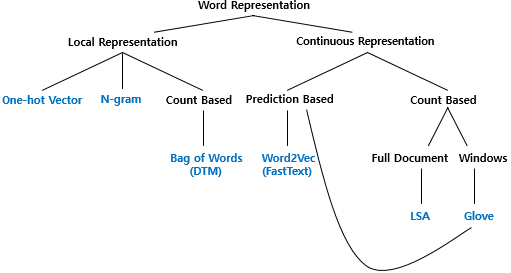

#Bag of Words (BOW)

단어의 빈도수를 세서 단어를 수치화하는 단어 표현 방법이다. 따라서, 순서를 고려하지 못한다.

BOW 만드는 방법

각 단어에 고유한 정수 index를 부여한다. : Vocab을 만든다

각 index의 위치에 그 단어가 등장한 횟수를 적는다.

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 51.0 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

def build_BOW(document):
  document = document.replace('.', '')
  tokenized_doc = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_doc:
    if word not in word_to_index.keys():
      #index 부여
      word_to_index[word] = len(word_to_index)
      #bow에 기본값 1을 넣는다.
      bow.insert(len(word_to_index)-1, 1)
    else:
      index = word_to_index.get(word)
      bow[index] += 1

  return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."

vocab, bow = build_BOW(doc1)
print("vocab: ", vocab)
print("bow: ", bow)

vocab:  {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bow:  [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


문서들을 합쳐서 하나의 문서를 만든 뒤, 그 문서를 기준으로 BoW를 만들 수 있다.



In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'
doc3 = doc1 + ' ' + doc2
vocab, bow = build_BOW(doc3)
print("vocab: ", vocab)
print("bow: ", bow)

vocab:  {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bow:  [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


별로 의미없는 '가' 등을 불용어 제거를 통해 더 좋은 data를 만들 수 있다.

BoW를 사용하는 상황은 자주 등장하는 단어들을 통해 어떤 성격의 문서인지를 판단할 때이다.

BoW 만드는 사이킷 런 class: CountVectorizer

길이가 2 이상인 것만 토큰으로 취급하고 띄어쓰기 만을 기준으로 토큰화하기 때문에 한국어에 적용했을 때 다영한 문제가 발생할 수 있다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you']
vector = CountVectorizer()

print("bag of words vector : ", vector.fit_transform(corpus).toarray())
print("vocab: ", vector.vocabulary_)

bag of words vector :  [[1 1 2 1 2 1]]
vocab:  {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#불용어 제거

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
#직접 정의한 불용어들

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words =["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
#Count Vectorizer가 제공하는 불용어

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)


bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)


bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


#문서의 벡터화

서로 다른 문서들의 BoW들을 결합하는 표현 방법: 문서 단어 행렬 (Document Term Matrix: DTM)

다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것이다.

문서1 : 먹고 싶은 사과
문서2 : 먹고 싶은 바나나
문서3 : 길고 노란 바나나 바나나
문서4 : 저는 과일이 좋아요

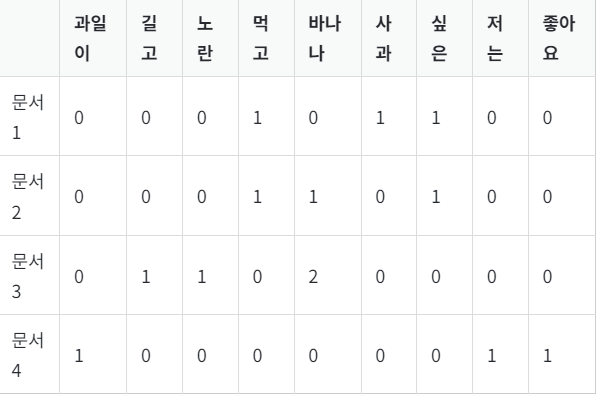

DTM의 한계

1. Sparsity representation

대부분의 값이 0이 되어 메모리 낭비와 계산이 오래 걸린다. 마치 one hot vector와 비슷한 문제점을 가진다.

2. 빈도수 기반

빈도 수를 기반으로 분석하는 것이기에 순서를 파악할 수 없고 중요도 또한 빈도수를 기반으로 파악하는 것이기에 자주 사용되지만 의미는 없는 불용어가 문서를 대표하는 단어가 될 수도 있다.예를 들어, The는 다양한 문서들에 자주 등장하는데 이런 단어들은 특별한 의미를 가지고 있지 않는다. 그렇다면 이를 어떻게 해결할까? TF-IDF를 이용하여 불용어와 실제로 중요한 단어에 가중치를 부여하여 중요도를 어느정도 표현할 수 있다.

#TF-IDF: 단어 빈고 - 역 문서 빈도

단어의 빈도와 역 문서 빈도를 통해 각 단어마다 중요한 정도를 가중치로 주는 방법이다. TF-IDF는 TF * IDF을 곱한 값을 의미한다.

TF(d,t): 특정 문서 d에서 단어 t가 등장한 횟수

==DTM과 같다

DF(t): 단어 t가 등장한 문서의 수

idf(t): df(t)에 반비례

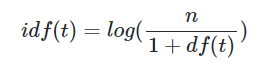

log를 사용하는 이유는 적당한 가중치를 주기 위해서이다. n=1000000일 때 log가 없다면

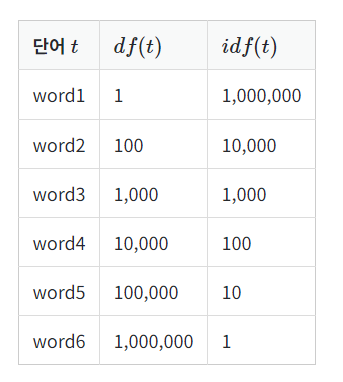

로그가 있다면

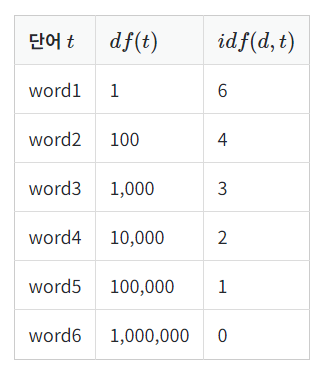

Tf-idf가 결국 의미하는 것은 모든 문서에서 자주 등장하는 단어는 The 처럼 중요도가 낮고 특정 문서에서만 자주 등장하는 단어는 그 문서를 잘 설명하는 문서이며 중요도가 높다고 판단한다.



#파이썬으로 TF-IDF 구현해보기

In [ ]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
#총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df=0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t,d):
  return tf(t,d)*idf(t)

In [ ]:
#DTM 출력하기
result = []

for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t,d))
tf_ = pd.DataFrame(result, columns=vocab)

In [ ]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
#각 단어에 대한 IDF 구하기

result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_


,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
#TF_IDF 행렬

result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


In [ ]:
#사이킷런 사용
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)


[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


#코사인 유사도를 이용한 추천 시스템

단어를 수치화된 vecotor로 만들어 표현했다면 이를 통해 문서의 유사도를 계산할 수 있다.

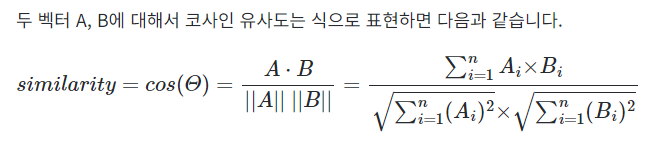

하나의 문서를 벡터화하기 위해서는 문서 단어 행렬이나 Tf-idf 행렬이 각각 A, B가 되는 것이다.

예시)

문서1 : 저는 사과 좋아요
문서2 : 저는 바나나 좋아요
문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

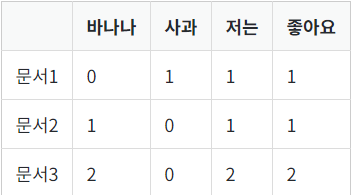

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A,B):
  return dot(A,B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',int(cos_sim(doc1, doc2)*100), '%')
print('문서 1과 문서3의 유사도 :',int(cos_sim(doc1, doc3)*100), '%')
print('문서 2와 문서3의 유사도 :',int(cos_sim(doc2, doc3)*100), '%')

문서 1과 문서2의 유사도 : 66 %
문서 1과 문서3의 유사도 : 66 %
문서 2와 문서3의 유사도 : 100 %


문서2와 문서3의 차이점은 빈도수만 차이나고 모두 동일한 단어를 사용한다. 그리고 문서1과 문서2의 유사도는 문서1과 문서3의 유사도와 같다는 것이다. 이것이 바로 cosine similarity의 특징이다. doc1와 doc2의 길이는 같다. 그리고 doc2와 doc3의 차이점은 빈도수만 다를 뿐 같은 단어들을 사용하고 있다. 유사도 연산에 문서의 길이를 포함시켰다면, doc1와 doc2의 유사도가 더 높다고 판단했을 수도 있다. 하지만 cosine similarity는 방향만을 고려 (문서의 패턴/단어)만을 고려하기 때문에 공정하게 비교를 할 수 있는 것이다.  

#간단한 추천 시스템을 만들자

좋아하는 영화를 입력하면 해당 영화의 줄거리와 비슷한 줄거리의 영화를 찾아서 추천하는 시스템을 만들자

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('/content/drive/MyDrive/Pytorch_Study/moviedata/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [3]:
data = data.head(20000)

In [4]:
#데이터 전처리
data['overview'].isnull().sum()

135

In [5]:
#null값 없애기
data['overview'] = data['overview'].fillna('')


In [6]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


47487 차원의 문서 벡터 (47487 단어로 이루어진 문서)가 20000개 존재한다고 보는 것이다.



In [7]:
#영화 제목을 key, 영화의 index를 value로 하는 title_to_index 딕셔너리 만들기

title_to_index = dict(zip(data['title'], data.index))

#실험해보기
idx = title_to_index['Father of the Bride Part II']
print(idx, ": ", data['title'][4])

4 :  Father of the Bride Part II


In [8]:
#모든 영화들의 서로의 cosine similarity 구하기
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("코사인 유사도 결과: ", cosine_sim.shape)

코사인 유사도 결과:  (20000, 20000)


In [9]:
cosine_sim

array([[1.        , 0.01575748, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01575748, 1.        , 0.04907345, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04907345, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.08375766],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08375766, 0.        ,
        1.        ]])

In [12]:
#제목을 입력하면 overview가 유사한 10개의 영화를 찾아내는 함수

def get_recommend(title, cosine_sim = cosine_sim):
  #입력한 영화의 index 가져오기
  idx = title_to_index[title]

  #해당 영화와 다른 영화들의 모든 cosine similarity 가져오기
  similarity_scores = list(enumerate(cosine_sim[idx]))

  #유사도에 따라 영화들을 정렬한다
  similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

  #가장 유사도가 높은 10개 가져오기
  similarity_scores = similarity_scores[1:11] #가장 높은건 자기 자신이니까 0은 제외

  #이 영화들의 인덱스를 통해 제목 얻어오기
  movie_indexes = [sim[0] for sim in similarity_scores]

  return data['title'].iloc[movie_indexes]




In [14]:
get_recommend("The Dark Knight Rises")

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

# 단어와 문서의 유사도를 구하는 다양한 방법

1. 유클리드 거리

흔히 고등학교 때 사용한 두 점 간의 거리를 이용하여 유사도를 계산하는 것이다. 그렇게 많이 사용되지는 않는다. 문서가 d개, 단어가 n개 있다면, n개의 차원에서 d개의 문서들을 점으로 표현하여 문서들 간의 유사도를 계산하는 것이다.

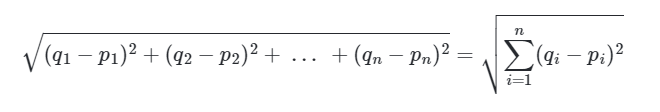


In [17]:
import numpy as np

def dist(x,y):
  return np.sqrt(np.sum((x-y)**2))

#DTM
doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',float(dist(doc1,docQ)))
print('문서2과 문서Q의 거리 :',float(dist(doc2,docQ)))
print('문서3과 문서Q의 거리 :',float(dist(doc3,docQ)))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


문서1과 문서 Q간의 거리가 가장 짧으므로 둘의 유사도가 제일 높음을 알 수 있다.

#자카드 유사도

A, B 두개의 집합이 있을 때, 교집합은 A, B의 공통된 원소들의 집합이므로, 합집합에서 교집합의 비율은 A와 B의 유사도를 의미한다고 볼 수 있다.

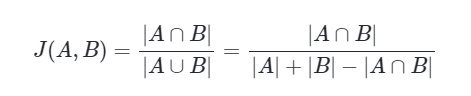

두 집합을 문서로 본다면

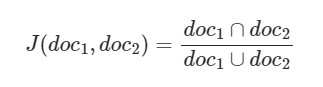



In [19]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

doc1_token = doc1.split()
doc2_token = doc2.split()

print("문서 1: ", doc1_token)
print("문서 2: ", doc2_token)


문서 1:  ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서 2:  ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [20]:
#합집합 구하기
union = set(doc1_token).union(set(doc2_token))
union

{'apple',
 'banana',
 'card',
 'coupon',
 'everyone',
 'holder',
 'like',
 'likey',
 'love',
 'passport',
 'watch',
 'you'}

In [21]:
#교집합 구하기
intersection = set(doc1_token).intersection(set(doc2_token))
intersection

{'apple', 'banana'}

In [22]:
print("자카드 유사도: ", len(intersection)/len(union))

자카드 유사도:  0.16666666666666666
